In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer #convert text to num
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
df = pd.read_csv("mbti_1.csv")
df.head()


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


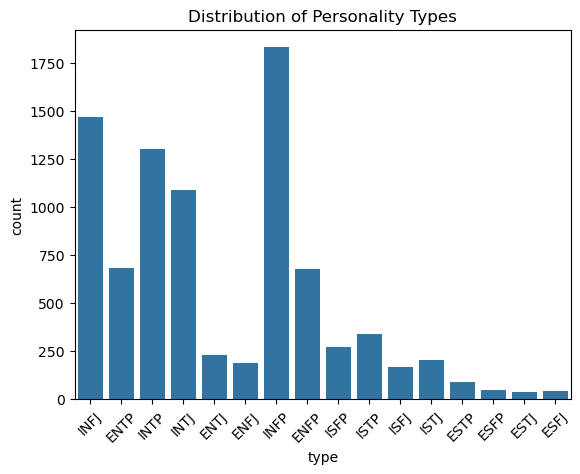

In [3]:
sns.countplot(x='type', data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Personality Types")
plt.show()


In [4]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'@\w+|\#\w+', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^a-z\s]', '', text)  # Keep only letters and spaces
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text
df['cleaned_posts'] = df['posts'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ather\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['type'])  # e.g., INTP -> 0, ENFJ -> 1


In [6]:
df['type'].value_counts()


type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64

In [7]:
X = df['cleaned_posts']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [8]:
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [10]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC()
}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)
    
    print(f"\n🧪 {name} Accuracy:", accuracy_score(y_test, preds))
    print(f"{name} Classification Report:\n", classification_report(y_test, preds, target_names=le.classes_))



🧪 Naive Bayes Accuracy: 0.41786743515850144
Naive Bayes Classification Report:
               precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        38
        ENFP       0.88      0.05      0.10       135
        ENTJ       0.00      0.00      0.00        46
        ENTP       0.61      0.15      0.24       137
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.45      0.47      0.46       294
        INFP       0.33      0.90      0.49       366
        INTJ       0.68      0.33      0.45       218
        INTP       0.54      0.59      0.56       261
        ISFJ       0.00      0.00      0.00        33
        ISFP       0.00      0.00      0.00        54
        ISTJ       0.00      0.00      0.00        41
        ISTP       0.50      0.01      0.03        67


E:\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🧪 Logistic Regression Accuracy: 0.6345821325648415
Logistic Regression Classification Report:
               precision    recall  f1-score   support

        ENFJ       0.64      0.24      0.35        38
        ENFP       0.72      0.55      0.62       135
        ENTJ       0.64      0.30      0.41        46
        ENTP       0.61      0.55      0.58       137
        ESFJ       1.00      0.11      0.20         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.25      0.06      0.09        18
        INFJ       0.61      0.72      0.66       294
        INFP       0.61      0.83      0.70       366
        INTJ       0.63      0.65      0.64       218
        INTP       0.66      0.80      0.72       261
        ISFJ       0.55      0.18      0.27        33
        ISFP       0.73      0.30      0.42        54
        ISTJ       0.80      0.20      0.31        41
        ISTP       0.73      0.49      

E:\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🧪 Linear SVM Accuracy: 0.6040345821325649
Linear SVM Classification Report:
               precision    recall  f1-score   support

        ENFJ       0.45      0.39      0.42        38
        ENFP       0.60      0.53      0.56       135
        ENTJ       0.63      0.48      0.54        46
        ENTP       0.51      0.52      0.52       137
        ESFJ       1.00      0.22      0.36         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.50      0.25      0.33         8
        ESTP       0.71      0.28      0.40        18
        INFJ       0.61      0.66      0.64       294
        INFP       0.64      0.73      0.68       366
        INTJ       0.57      0.59      0.58       218
        INTP       0.68      0.73      0.70       261
        ISFJ       0.57      0.39      0.46        33
        ISFP       0.41      0.33      0.37        54
        ISTJ       0.46      0.29      0.36        41
        ISTP       0.58      0.52      0.55        67

  

In [13]:
def predict_personality(text, model):
    text_clean = clean_text(text)
    vector = tfidf.transform([text_clean])
    pred = model.predict(vector)
    return le.inverse_transform(pred)[0]

# Example
user_input = "I love spending time alone thinking about future possibilities and ideas."
print("Predicted Personality:", predict_personality(user_input, models['Linear SVM']))


Predicted Personality: INFP


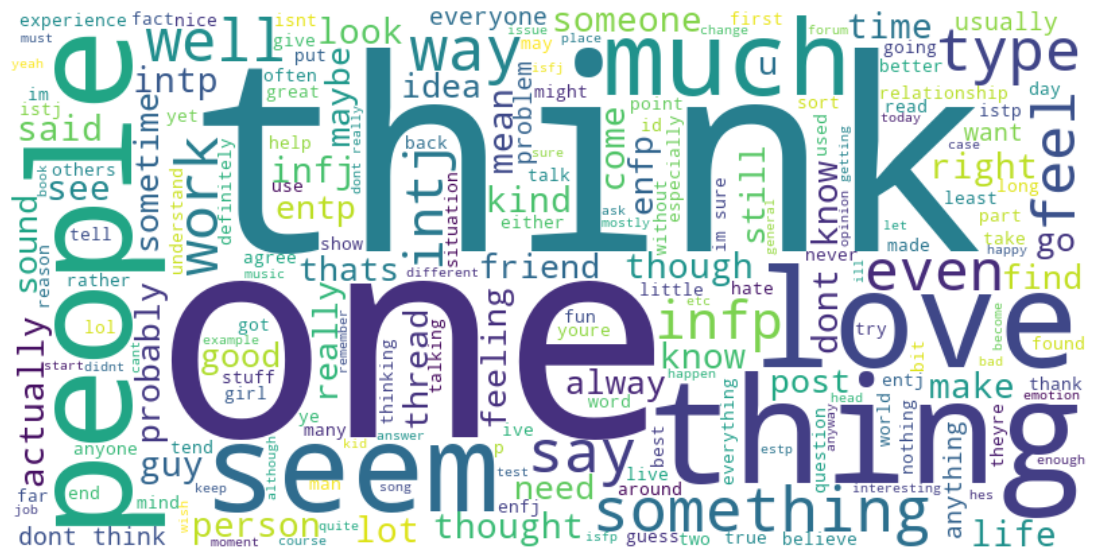

In [14]:
from wordcloud import WordCloud

def show_wordcloud(data):
    text = ' '.join(data)
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(15, 7))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

show_wordcloud(df['cleaned_posts'])


In [15]:
import joblib
joblib.dump(model, "mbti_model.pkl")
joblib.dump(tfidf, "vectorizer.pkl")


['vectorizer.pkl']

In [16]:
model = joblib.load("mbti_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")
